<a href="https://colab.research.google.com/github/anesz271/NN-first-steps/blob/main/simple_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=0.75 b=6.32, loss=34.17524
Epoch  2: w=0.03 b=5.45, loss=23.53568
Epoch  3: w=0.11 b=4.89, loss=19.76055
Epoch  4: w=0.26 b=4.40, loss=16.63090
Epoch  5: w=0.40 b=3.96, loss=13.99728
Epoch  6: w=0.53 b=3.55, loss=11.78072
Epoch  7: w=0.65 b=3.17, loss=9.91516
Epoch  8: w=0.77 b=2.83, loss=8.34503
Epoch  9: w=0.87 b=2.51, loss=7.02354
Epoch 10: w=0.96 b=2.22, loss=5.91132
Epoch 11: w=1.05 b=1.95, loss=4.97522
Epoch 12: w=1.13 b=1.71, loss=4.18736
Epoch 13: w=1.20 b=1.49, loss=3.52427
Epoch 14: w=1.26 b=1.28, loss=2.96617
Epoch 15: w=1.32 b=1.09, loss=2.49646
Epoch 16: w=1.38 b=0.92, loss=2.10113
Epoch 17: w=1.43 b=0.76, loss=1.76840
Epoch 18: w=1.48 b=0.62, loss=1.48836
Epoch 19: w=1.52 b=0.48, loss=1.25267
Epoch 20: w=1.56 b=0.36, loss=1.05430
Epoch 21: w=1.60 b=0.25, loss=0.88735
Epoch 22: w=1.63 b=0.14, loss=0.74683
Epoch 23: w=1.66 b=0.05, loss=0.62856
Epoch 24: w=1.69 b=-0.04, loss=0.52903
Epoch 25: w=1.71 b=-0.12, loss=0.44525


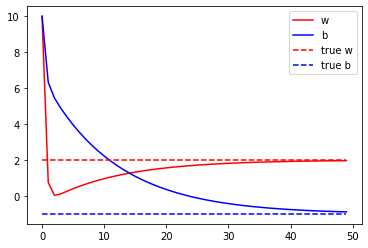

In [ ]:
# import functions and libraries
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# define loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# define training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  # Here is where you differentiate the model values with respect to the loss function
  dw, db = t.gradient(current_loss, [model.w, model.b])
  # And here is where you update the model values based on the learning rate chosen
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

# define simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

# training the model
# define input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.08

# instantiate model
model = Model()

# collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))
  
# plot training values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'true w', 'true b'])
plt.show()